In [1]:
from IPython.display import Image
from google.colab import drive
drive.mount('/content/drive')
ROOT = '/content/drive/My Drive/ENGRI 1101/max_flow_lab_colab'

Mounted at /content/drive


# Max Flow Lab

**Objectives:**
* Understand Ford-Fulkerson algorithm, in particular 
    - (use of) residual graphs
    - backward/forward edges
    - path in residual graph and minimum residual capacity
    - finding s,t-cut
* Intro to using Python
    - intro to NetworkX
    - using functions    

## Part 1: Ford-Fulkerson (By Hand)

In the first part of the lab, we will solve a max flow instance using the algorithm you learned in class.  This will give you
practice using the *residual graph*.

Consider the following instance. The source (where the flow
comes from) is node 0 and the sink (where the flow goes to) is
node 6. The numbers on the arcs are the capacities. We would
like to push as much flow as we can from node 0 to node 6. So how do we start?

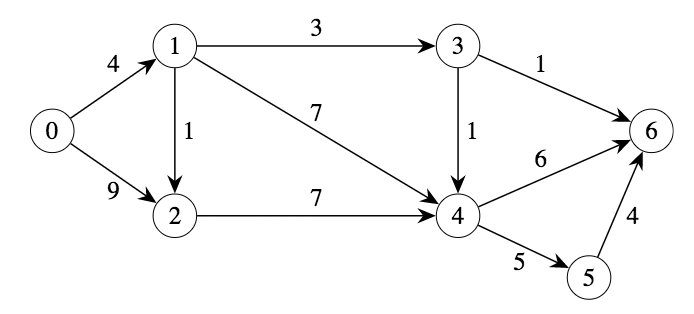

In [2]:
Image(ROOT+'/graph_1.png')

Let's pick a path that goes from 0  to 6 (if there is any), and push as much flow as possible through this path. Say we pick the path 0-1-4-6. 

**Q1:** How many units of flow can be pushed through this path?

**A:** 

**Q2:** Is there an arc which got *saturated* (that is, no more flow can go through it)?

**A:**

Now, we write down the flow on the arcs (the flow is the number inside a box, the other is the capacity of the arc).

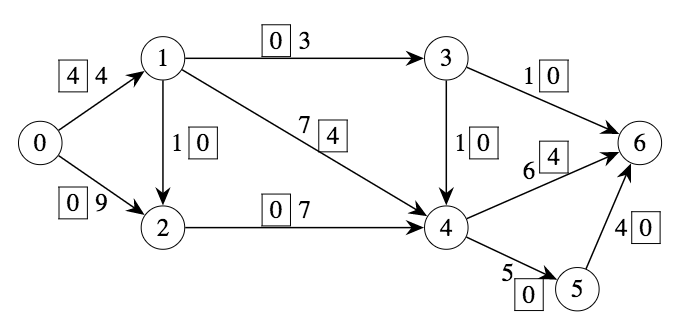

In [3]:
Image(ROOT+'/graph_2.png')

What would be the next step? We might think that it's a reasonable
idea to decrease the capacities on the arcs of the path by the amount
of flow we have just pushed through them, and start anew with the
resulting graph. But this greedy approach wouldn't let us reverse flow
on the arcs, and reversing flow is an essential part of the algorithm
as we have seen in lecture. So instead of just decreasing the
capacities on arcs that are on the *augmenting path*, we will
introduce new arcs that show how much flow can be sent in the reverse
direction between the nodes. We will draw all the original arcs that
are not yet saturated, and also reverse arcs between those nodes where
there is positive flow --- this flow can potentially be reversed. The resulting graph is called the *residual graph*.

So, for example, arc $(1,4)$ has remaining capacity
$7-4=3$, so we write this capacity on the arc in the residual graph.
Also, the flow of value 4 could be sent back from 4 to 1, so we draw the arc $(4,1)$ with capacity 4 in the
residual graph. Capacities on the arcs in the residual graph are
called *residual capacities*. Below is the residual graph that
corresponds to the flow in the graph. 

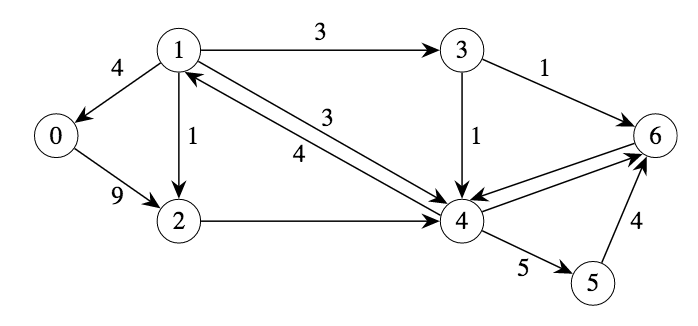

In [4]:
Image(ROOT+'/graph_3.png')

**Q3:** What are the residual capacities for arcs (2,4), (4,6), and (6,4)?
    
**A:** 

**Q4:** Why is there no arc from 0 to 1 in the residual graph?

**A:** 

The residual graph tells us which arcs can have more
flow pushed through them and in what direction. At each iteration,
we look for a path from the source to the sink in the residual graph. If we find
one, we can decrease flow on backwards arcs and increase flow on forwards arcs
along this path. Then, we redraw the residual graph, look for a
new path, and so on. When do we stop? If we can't find a path from
source to sink in the residual graph. Does this mean that we have
an optimal flow?  Yes, and the last residual graph lets us read
off a minimum cut that proves it.

**Q5:** Use the blank graphs below to finish the algorithm for this problem. 
At each step pick a path from 0 to 6 in the
residual graph (start with the residual graph above), determine how
much flow you can push through this path, draw the new flow on the
arcs of the graph on the left, and the residual graph into the "empty"
graph on the right. 

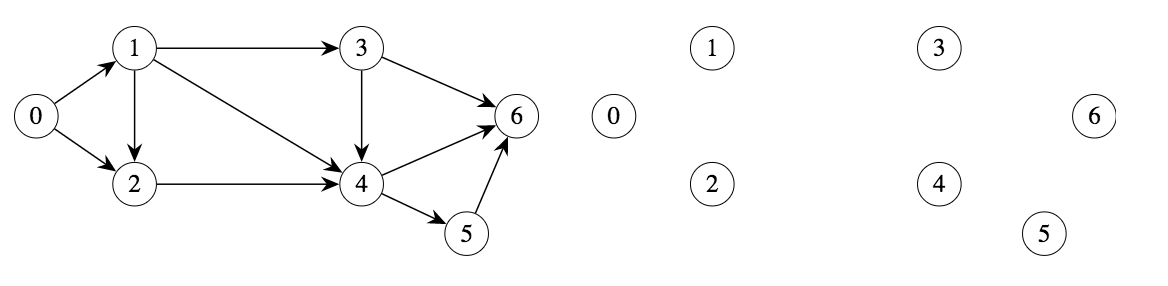

In [5]:
Image(ROOT+'/graph_4.png')

**Q6:** What is the value of the optimal flow? Did you use any reverse arcs to improve the flow?

**A:** 

**Q7:**. Take a look at the last residual graph. Why did you stop? Which nodes can be reached by a directed path from the source in the residual graph? 

**A:**

**Q8:** Draw a *cut* in the last graph on the left between those nodes that are reachable from 0 and those that are not.

**A:**

**Q9:** Add up the capacities on the arcs that cross the cut from the "source-side" to the "sink-side" (in the original graph). How does this value compare with the maximum flow? What can you now conclude about the flow you found? Give a short explanation.

**A:** 

## Part 2: Ford-Fulkerson (Python)

You will now use Python to help you run the Ford-Fulkerson algorithm. This lab is meant to give you a flavor of Python. We hope that the comments in the code (the lines that start with `#`) are sufficient to give an idea of what the Python commands are doing --- you are not expected to be able to code this yourself from scratch. (If you major or minor in CS you will learn this soon enough.)

Note that you can run Python code in this notebook by pressing Ctrl-Enter when you have highlighted the cell with the code you want to run. You can also press Shift-Enter, to run the code, and highlight the next cell.

We start by defining the input in Python. We will use the package "NetworkX" to manipulate and display graphs. We will consider a new max flow instance. The nodes in this instance are numbered 1, 2, 3, 4, 5 and 6, and we want to find the Maximum Flow from node 1 to node 6.

Read the code below, and run it.

In [ ]:
# REMINDER: Select this cell and press Shift+Enter to run it

# To use a package, we use the command "import" in Python
import networkx as nx

# G is directed graph 
G = nx.DiGraph() 

# We define G based on the edges, and the capacity on each edge.
# This is one way of doing this in Python: we give a list of the endpoints of each edge and its capacity,
# for instance, edge (1,2) is defined to have capacity 2, (1,3) capacity 5, etc.
edgeList = [(1,2,2),(1,3,5),(2,4,1),(3,2,1),(3,5,3),(4,6,6),(5,2,1),(5,4,2),(5,6,1)]

# We then create the graph based on this list.
G.add_weighted_edges_from( edgeList, 'cap' )

# Each edge will have a flow associated with it. At the start of the algorithm the flow on each edge is 0.
# We initialize this by going through the edges in a for-loop, and then get the attribute 'flow' for this 
# edge equal to 0.
for i, j in G.edges:
    G.edges[i,j]['flow'] = 0

NOTE: Pay attention to the white space in the code: in Python white space indentation is used to signal that these commands are part of the `for`-loop.

The code above initializes the graph, but it does not display anything. Let's run some code that shows what we are doing --- run the code below.

In [ ]:
# We want to display the graph --- let's give the computer the coordinates of the nodes we want.    
pos = ((0,0),(0,10),(10,20),(10,0),(30,20),(30,0),(40,10))

# And then we use NetworkX to draw the graph.
nx.draw_networkx(G,pos,node_size=500,node_color='darkorange')

As you can see, the flows and capacities are not displayed on the graph. To do this, you can run the following code.

In [ ]:
# We create a label for each edge that will contain the string "flow/cap". 
label = {}
for i, j in G.edges:
    label[(i,j)] = str( G.edges[i,j]["flow"] ) + " / " + str( G.edges[i,j]["cap"] )
    
# Next we draw the graph again.    
nx.draw_networkx(G,pos,node_size=500,node_color='darkorange')
# And now add the labels to the edges.
nx.draw_networkx_edge_labels(G,pos,edge_labels=label);

So this is the input that we want to run the Ford-Fulkerson algorithm on. As a reminder, every iteration of the algorithm works as follows:

- Create the residual graph $G_x$ based on the current flow
- Find a path in $G_x$ from $s$ to $t$ (here from 1 to 6)
    * If a path exists, update the flow
    * Otherwise you have found a Maximum Flow
    
So first we want to create the residual graph $G_x$. Recall that we create this graph by adding forward edges with residual capacity equal to the remaining capacity of the edge on which flow could be pushed and backward edges with residual capacity equal to the flow on that edge.

You will now implement this logic in the framework below. The framework is set up to iterate over the edges in the input graph, and you will add edges to the residual graph based on each of these edges, the flow of the edge, and the capacity.

The Python code for adding edge $(i,j)$ to the graph that is called "residualGraph" is

`residualGraph.add_edge( i, j )`

You can give the edge $(i,j)$ an attribute "residual capacity" with value 5 (for instance), using the code

`residualGraph.edges[i,j][ "residual capacity" ] = 5`

Please use the attribute "residual capacity" to denote the residual capacity on each edge, as this will be used to plot the residual graph. There is also the attribute "forward edge" that you need to set to `True` or `False`, depending on whether the edge you are adding to the residual graph is a forward edge (`True`) or a backward edge (`False`).

**Q10:** Finish the code below to create the residual graph.

In [ ]:
# First we create the residual graph in Python.
residualGraph = nx.DiGraph()

# Next we iterate over all edges
for i, j in G.edges:
# We store the capacity of edge (i,j) in the variable c, and the flow in the variable f
    c = G.edges[ i,j ]['cap']
    f = G.edges[ i,j ]['flow'] 
    
    # UNCOMMENT AND FINISH THE CODE BELOW
    if( c > f ):
#         residualGraph.add_edge(i,j)
#         residualGraph.edges[i,j]['residual capacity'] = XXX
#         residualGraph.edges[i,j]['forward edge'] = XXX 

    if ( f > 0 ):
#         residualGraph.add_edge( XXX, XXX )
#         residualGraph.edges[ XXX, XXX ]['residual capacity'] = XXX
#         residualGraph.edges[ XXX, XXX ]['forward edge'] = XXX 

We would like to make sure our code is working as expected, so let's plot the residual graph. Run the cell below.

In [ ]:
nx.draw_networkx(residualGraph,pos,node_size=500,node_color='limegreen',connectionstyle='arc3, rad=0.1')
residualcap = nx.get_edge_attributes( residualGraph, 'residual capacity' )        
nx.draw_networkx_edge_labels(residualGraph,pos,edge_labels=residualcap,label_pos=0.66);

The nodes are drawn in green as a visual reminder that we are looking at the residual graph. Also, the edges are drawn with a slight bend, because we know there will often be both an arc $(i,j)$ and $(j,i)$ in the residual graph. The residual capacities are given closer to the tail of the edges.

Let's now do an iteration of Ford-Fulkerson. 

**Q11:** Find a path from 1 to 6 in the residual graph, and define delta to be the minimum residual capacity of the edges in this path.

You can define a path in Python by listing the edges in the path as follows:

`path = [(1,2),(2,3)]` 

defines the path with edges (1,2) and (2,3).

In [ ]:
flowpath = []
delta = 

**Q12:** Let's update the flow according to what you found above. 

Recall that updating the flow in $G$ is different for forward and backwards edges in the residual graph.

In [ ]:
 # FINISH THE CODE BELOW
for i, j in flowpath:
    if residualGraph.edges[i,j]['forward edge']:
        G.edges[i,j]['flow'] = G.edges[i,j]['flow'] + # XXX
    else:
        G.edges[i,j]['flow'] = G.edges[i,j]['flow'] + # XXX

Let's plot the graph with the current flow.

In [ ]:
label = {}
for i, j in G.edges:
    label[(i,j)] = str( G.edges[i,j]["flow"] ) + " / " + str( G.edges[i,j]["cap"] ) 
nx.draw_networkx(G,pos,node_size=500,node_color='darkorange')
nx.draw_networkx_edge_labels(G,pos,edge_labels=label);

This concludes the first iteration of the Ford-Fulkerson Algorithm! Let's do this again! Did you notice we used the same code to plot the flow graph? When we have code we want to reuse, we should make a "function". You can do this in Python using the command "def". As an example, let's define a function to plot the graph with the current flow, called PlotFlow():

In [ ]:
def PlotFlow():
    label = {}
    for i, j in G.edges:
        label[(i,j)] = str( G.edges[i,j]["flow"] ) + " / " + str( G.edges[i,j]["cap"] )
    nx.draw_networkx(G,pos,node_size=500,node_color='darkorange')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=label);

After running the code in the cell above, it now suffices to just type

`PlotFlow()`

to see the current flow.

**Q14:** Try this in the next cell.

In [ ]:
#SOLUTION

Great! Let's do the same thing for plotting the residual graph. 

**Q15:** Finish the code below, by copying the appropriate code from cells above. 

The function should first determine the residual graph, and then plot it. (The declaration `global residualGraph` is there to make sure that the variable residualGraph in the workbook is updated, and not just a new variable that only exists inside the function.)

In [ ]:
def PlotResidualGraph():

    global residualGraph
    
    # COPY AND PASTE THE APPROPRIATE CODE HERE

You can check that your function is working by running the cell below.

In [ ]:
PlotResidualGraph()

As a reminder: The residual capacities are given closer to the tail of the edges than the head, again, because there will often be two edges between $i$ and $j$.

**Q16:** Find another 1 to 6 path in the residual graph, and find the minimum residual capacity of the edges on this path.

In [ ]:
flowpath = []
delta = 

Let's update the flow again but this time make a function.

**Q17:** Copy your code from Q12 to create a function that updates the flow according to the variables flowpath and delta

In [ ]:
def UpdateFlow():
    # COPY YOUR CODE HERE

Run this cell to update the flow.

In [ ]:
UpdateFlow()

And run this cell to view the new flow graph.

In [ ]:
PlotFlow()

Let's do another iteration!

In [ ]:
PlotResidualGraph()

**Q18:** Find another path.

In [ ]:
flowpath = []
delta = 

In [ ]:
UpdateFlow()

In [ ]:
PlotFlow()

In [ ]:
PlotResidualGraph()

Did we find an optimal flow?  If you did the previous iterations correctly, there is no longer a path from 1 to 6 in the residual graph. Recall that this means that the flow is optimal, and you can show this by exhibiting a cut that has capacity equal to the flow value. This cut can be found using a "Labeling algorithm" that maintains a list of checked nodes that it still needs to process. 

## Part 3: Labeling Algorithm 

### Labeling algorithm 
- Mark $s$ with a $\checkmark$. Let the list initially contain just node $s$.
- Until the list is empty:
    * Take any node (e.g., the first one) off of the list. Suppose that $i$ is the name of this node. For each arc leaving $i$, that is, each $(i,j) \in E_x$, if $j$ is unchecked, check it and add it to the list.

The nodes that have been checked are those nodes that are reachable from $s$ by a path in $G_x$.

Let's implement this "labeling algorithm".

In [ ]:
# we first make all nodes except node 1 unchecked
for i in G.nodes:
    G.nodes[i]["check"] = False
G.nodes[1]["check"] = True

# then we initialize the list of checked nodes that we still need to process
list = { 1 }

# until the list is empty
while ( len( list ) > 0 ):
    # take any node off of the list
    i = list.pop() 
    
    # for each arc leaving i, that is (i,j) in the edge set of the residual graph
    for j in residualGraph.neighbors(i):
        # if j is unchecked        
        if not G.nodes[j]["check"]:
            # check it
            G.nodes[j]["check"] = True
            # and add it to the list
            list.add( j )

# finally we output the checked nodes
for i in G.nodes:
    if G.nodes[i]["check"]:
        print( i )

**Q19:** What is the cut that the "labeling algorithm" finds? What is the capacity of the cut?

**A:**

We can modify the code to find a path in the residual graph if there is one, by keeping track of the node $i$ we came from when we first check a node $j$. We can do this by adding another attribute to the nodes, called "prev", and defining this in the algorithm. As soon as we encounter node 6 we can backtrack using "prev" to find the path.

**Q20:** Modify the code to include this idea.
Add the missing line in the following function.

In [ ]:
def LabelingAlgorithm():
    # we first make all nodes except node 1 unchecked
    for i in G.nodes:
        G.nodes[i]["check"] = False
    G.nodes[1]["check"] = True

    # then we initialize the list of checked nodes that we still need to process
    list = { 1 }

    # until the list is empty
    while ( len( list ) > 0 ):
        # take any node off of the list
        i = list.pop() 

        # for each arc leaving i, that is (i,j) in the edge set of the residual graph
        for j in residualGraph.neighbors(i):
            # if j is unchecked        
            if not G.nodes[j]["check"]:
                # check it
                G.nodes[j]["check"] = True
                
                # ADD YOUR CODE HERE
                  
                # and add it to the list
                list.add( j )

Let's start with the same graph again.

In [ ]:
G = nx.DiGraph()  # Create a directed graph
edgeList = [(1,2,2),(1,3,5),(2,4,1),(3,2,1),(3,5,3),(4,6,6),(5,2,1),(5,4,2),(5,6,1)]  # create edges / capacities
G.add_weighted_edges_from( edgeList, 'cap' )  # add edges / capacities to graph
for i, j in G.edges:
    G.edges[i,j]['flow'] = 0 # set flows to zero

Let's plot the flow and the residual graphs.

In [ ]:
PlotFlow()

In [ ]:
PlotResidualGraph()

Run the labeling algorithm.

In [ ]:
LabelingAlgorithm()

We can now use the atribute "check" to see whether node 6 is reachable from node 1 in the residual graph.

**Q21:** Print the attribute "check" of node 6.

In [ ]:
# print()

Let's use the "prev" attribute to find a path from 1 to 6 in the residual graph. Run the cell to generate the augmenting path in the residual graph.

In [ ]:
j = 6
flowpath = []
while j != 1:
    i = G.nodes[j]["prev"]
    flowpath.insert( 0, (i,j) )
    j = i
print(flowpath)

And let's find the minimum residual capacity on this path. You can use ```math.min(a,b)``` to get the minimum of the numbers ```a``` and ```b```. A nice trick is starting off by defining delta to be ```math.inf```.

**Q22:** Finish the code below to find the minimum residual capacity on path.

In [ ]:
import math

delta = math.inf
for i, j in flowpath:
    # UNCOMMENT AND FINISH THIS CODE
    # delta = min( XXX, XXX )
    
print( delta )

Now we can use the function defined earlier to update the flow!

In [ ]:
UpdateFlow()
PlotFlow()

In [ ]:
PlotResidualGraph()

Let's run the labelling algorithm again.

In [ ]:
LabelingAlgorithm()

Let's make a new function to find and print an $s-t$ path in the residual graph and its corresponding delta.

**Q23:** Finish the code by copy and pasting code from earlier in this workbook.

In [ ]:
def PrintPathAndDelta():
    global flowpath, delta
    
    # ADD YOUR CODE HERE

Run this cell to make sure your function works as expected.

In [ ]:
PrintPathAndDelta()

Let's update the flow again.

In [ ]:
UpdateFlow()
PlotFlow()

In [ ]:
PlotResidualGraph()

# Part 4: Putting Everything Together

You're probably getting a bit sick from pressing Ctrl-Enter every time. Let's automate the procedure!

In [ ]:
import matplotlib.pyplot as plt # use this to prevent graphs from displaying on top of eachother

# Define the input graph
G = nx.DiGraph() 
edgeList = [(1,2,2),(1,3,5),(2,4,1),(3,2,1),(3,5,3),(4,6,6),(5,2,1),(5,4,2),(5,6,1)]
G.add_weighted_edges_from( edgeList, 'cap' )
for i, j in G.edges:
    G.edges[i,j]['flow'] = 0

PlotResidualGraph() # plot the residual graph
LabelingAlgorithm() # run the labeling algorithm to find a s-t path in the residual graph
while G.nodes[6]["check"]: # while there is an s-t path in the residual graph
    plt.figure()
    PrintPathAndDelta() # show it
    UpdateFlow() # update the flow
    PlotResidualGraph() # plot the new residual graph
    LabelingAlgorithm() # run the labeling algorithm to find a s-t path in the new residual graph

Let's have a look at the maximum flow.

In [ ]:
PlotFlow()

And let's also display the cut.

**Q24:** Use the code from earlier to print the nodes that are "checked".

You now have implemented the Ford-Fulkerson algorithm in Python! With a few more tweaks you could use this on any graph.

**Bonus:** You have seen all the ingredients necessary to also implement Dijkstra's algorithm for the Shortest Path Problem. Implement this algorithm in Python.